### Sınıf Dengesizliği

In [4]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


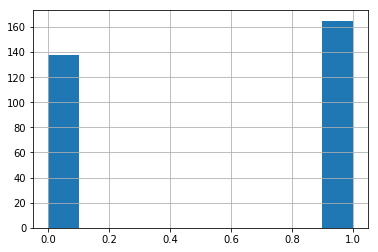

In [6]:
df.target.hist()

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
def create_model(X, Y):
    X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = Y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    prediction_train = logreg_model.predict(X_train)
    prediction_test = logreg_model.predict(X_test)
    error_matris_train = confusion_matrix(y_train, prediction_train)
    error_matris_test = confusion_matrix(y_test, prediction_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("train veri kümesi")
    print(classification_report(y_train,prediction_train) )
    print("Test veri kümesi")
    print(classification_report(y_test,prediction_test) )
    return  None

In [15]:
X = df.drop('target', axis=1)
Y = df.target

create_model(X,Y)

Modelin doğruluk değeri :  0.7213114754098361
train veri kümesi
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       110
           1       0.85      0.93      0.89       132

   micro avg       0.87      0.87      0.87       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.87      0.87       242

Test veri kümesi
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

   micro avg       0.72      0.72      0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [22]:
hasta = df[df.target == 1]
saglikli = df[df.target == 0]

print('Sağlıklı sayısı:', len(saglikli),'\n'
     'Hasta Sayısı:', len(hasta))

Sağlıklı sayısı: 138 
Hasta Sayısı: 165


### Örneklem arttırma

In [23]:
from sklearn.utils import resample

In [24]:
saglikli_art = resample(saglikli,
                       replace = True,
                       n_samples = len(hasta),
                       random_state = 11)
df_art = pd.concat([hasta, saglikli_art])
df_art.target.value_counts()

1    165
0    165
Name: target, dtype: int64

In [25]:
create_model(df_art.drop('target', axis = 1), df_art.target)

Modelin doğruluk değeri :  0.8484848484848485
train veri kümesi
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       132
           1       0.82      0.89      0.86       132

   micro avg       0.85      0.85      0.85       264
   macro avg       0.85      0.85      0.85       264
weighted avg       0.85      0.85      0.85       264

Test veri kümesi
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.81      0.91      0.86        33

   micro avg       0.85      0.85      0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



### SMOTE

In [ ]:
python -m pip install --upgrade pip

In [35]:
from imblearn.over_sampling import SMOTE

In [37]:
y = df.target
X = df.drop('target', axis = 1)

sm = SMOTE(random_state = 32, ratio = 1.0)
X_smote, y_smote = sm.fit_sample(X,y)

In [38]:
create_model(X_smote, y_smote)

Modelin doğruluk değeri :  0.8484848484848485
train veri kümesi
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       132
           1       0.82      0.88      0.85       132

   micro avg       0.84      0.84      0.84       264
   macro avg       0.85      0.84      0.84       264
weighted avg       0.85      0.84      0.84       264

Test veri kümesi
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.79      0.94      0.86        33

   micro avg       0.85      0.85      0.85        66
   macro avg       0.86      0.85      0.85        66
weighted avg       0.86      0.85      0.85        66



### ADASYN

In [48]:
from imblearn.over_sampling import ADASYN

In [49]:
Y = df.target
X = df.drop('target', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, Y)

ValueError: No samples will be generated with the provided ratio settings.